# <font color='red'>SGD Algorithm to predict movie ratings</font>

<pre>
1. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $


1. Construct adjacency matrix with the given data, assuming its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like A[i][j]=r_{ij} here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j)$ 

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. Instead of using SVD decomposition we can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

We can also investigate if our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. We can predict this signal given the features U


> __Note 1__ : there is no train test split in the data, the goal of this is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils.extmath import randomized_svd
import matplotlib.pyplot as plt

<font color='red'> Reading the csv file </font>

In [2]:
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [3]:
data.shape

(89992, 3)

<font color='red'>Create your adjacency matrix </font>

In [4]:
from scipy.sparse import csr_matrix
M=data['user_id'].max()+1
N=data['item_id'].max()+1
adjacency_matrix = csr_matrix((data['rating'], (data['user_id'], data['item_id'])), shape=(M,N))
# write your code of adjacency matrix here

In [5]:
adjacency_matrix.shape

(943, 1681)

<font color='red'> SVD decompostion</font>

In [7]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice
# Choosing n_components to be 100 here
U,Sigma,VT=randomized_svd(adjacency_matrix, n_components=100,n_iter=5, random_state=15)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 100)
(100,)
(1681, 100)


<font color='red'>Compute mean of ratings</font>

In [8]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details
    return ratings.mean()

In [9]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [11]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    return [0]*dim

In [12]:
dim= M# give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [13]:
dim=N # give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

<font color='red'>Compute dL/db_i</font>

In [15]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha,b_i,c_j):
    '''In this function, we will compute dL/db_i'''
    return 2*(mu+b_i[user_id]+c_j[item_id]+np.dot(U[user_id,:],V[:,item_id])+(alpha*b_i[user_id])-rating)

<font color='red'>Compute dL/dc_j</font>

In [17]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha,b_i,c_j):
    '''In this function, we will compute dL/dc_j'''
    return 2*(mu+b_i[user_id]+c_j[item_id]+np.dot(U[user_id,:],V[:,item_id])+(alpha*c_j[item_id])-rating)


<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j)$

In [19]:
epochs=50
alpha=0.1
learning_rate=0.01
predicted_ratings=np.zeros(adjacency_matrix.shape)
b_i=initialize(M)
c_j=initialize(N)
MSE_list=[]
for epoch in range(epochs):
    MSE_epoch=0
    for user_id in range(M):
        for item_id in range(N):
            b_i[user_id] = b_i[user_id]-(learning_rate)*derivative_db(user_id,item_id,adjacency_matrix[user_id,item_id],U,VT,mu,alpha,b_i,c_j)
            c_j[item_id] = c_j[item_id]-(learning_rate)*derivative_dc(user_id,item_id,adjacency_matrix[user_id,item_id],U,VT,mu,alpha,b_i,c_j)
    for user_id in range(M):
        for item_id in range(N):
            predicted_ratings[user_id,item_id]=mu+b_i[user_id]+c_j[item_id]+np.dot(U[user_id,:],VT[:,item_id])
            MSE_epoch+=(predicted_ratings[user_id,item_id]-adjacency_matrix[user_id,item_id])**2
    MSE_list.append(MSE_epoch/(M*N))
            

<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

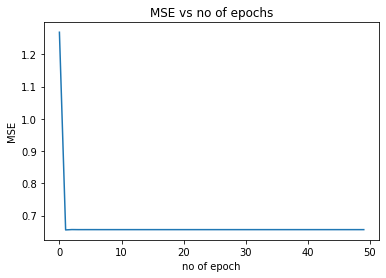

In [20]:
plt.plot(range(len(MSE_list)),MSE_list)
plt.title("MSE vs no of epochs")
plt.xlabel("no of epoch")
plt.ylabel("MSE")
plt.show()

<br>

<font color='red'> Task 2</font>

In [21]:
user_info=pd.read_csv('user_info.csv')
user_info.head()
y_is_male=user_info['is_male']

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg_clf=LogisticRegression(random_state=15)
log_reg_clf.fit(U,y_is_male)

LogisticRegression(random_state=15)

In [23]:
y_is_male_pred=log_reg_clf.predict(U)
train_acc=(np.sum(y_is_male!=y_is_male_pred))/len(y_is_male)

In [24]:
print(train_acc)
#very poor training error

0.28844114528101805


In [25]:
print(y_is_male_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [26]:
#The fitted model predicts all the users as male ecxept one.
#Hence the user feature representation is not good to predict gender of the user 